In [1]:
import h5py
import numpy as np
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

## Read the hdf5 file using `h5py`

In [2]:
h5f = h5py.File('apec_emissivity_v2.h5', 'r')

### It works similar to a dictionary in python. We can print the keys and values in this file.

In [3]:
for k, v in h5f.items():
    print(k, v)

E <HDF5 dataset "E": shape (151,), type "<f8">
emissivity_metals <HDF5 dataset "emissivity_metals": shape (100, 150), type "<f8">
emissivity_primordial <HDF5 dataset "emissivity_primordial": shape (100, 150), type "<f8">
log_T <HDF5 dataset "log_T": shape (100,), type "<f8">


### There are 4 datasets in this file, `E`, `emissivity_metals`, `emissivity_primordial`, and `log_T`.

`E` is a 1D array that has 151 numbers. These are the edges of the energy bin.

`log_T` is a 1D array that has 100 numbers.

`emissivity_metals` and `emissivity_primordial` are 2D arrays that have 100 by 150. These are the average emissivity in each energy bin corresponding to the 100 temperatures in log_T. The unit is in [erg/s/keV$\cdot$cm$^3$].

### Use `h5f['key'].value` To acceess the data. For example, to get the energy bins

In [4]:
h5f['E'].value

array([   0.1       ,    0.10471285,    0.10964782,    0.11481536,
          0.12022644,    0.12589254,    0.13182567,    0.13803843,
          0.14454398,    0.15135612,    0.15848932,    0.16595869,
          0.17378008,    0.18197009,    0.19054607,    0.19952623,
          0.20892961,    0.21877616,    0.22908677,    0.23988329,
          0.25118864,    0.2630268 ,    0.27542287,    0.28840315,
          0.30199517,    0.31622777,    0.33113112,    0.34673685,
          0.36307805,    0.3801894 ,    0.39810717,    0.41686938,
          0.43651583,    0.45708819,    0.47863009,    0.50118723,
          0.52480746,    0.54954087,    0.57543994,    0.60255959,
          0.63095734,    0.66069345,    0.69183097,    0.72443596,
          0.75857758,    0.79432823,    0.83176377,    0.87096359,
          0.91201084,    0.95499259,    1.        ,    1.04712855,
          1.0964782 ,    1.14815362,    1.20226443,    1.25892541,
          1.31825674,    1.38038426,    1.44543977,    1.51356

### This will read all the data into memory

In [5]:
E = h5f['E'].value
emis_primordial = h5f['emissivity_primordial'].value
emis_metals = h5f['emissivity_metals'].value
log_T = h5f['log_T'].value

# Close the file as we don't need it anymore
h5f.close()

## How to get the energy differences in each bin as an array?

In [6]:
dE = E[1:] - E[:-1]
print(dE.shape)
print(dE)

(150,)
[ 0.00471285  0.00493496  0.00516754  0.00541108  0.0056661   0.00593313
  0.00621275  0.00650555  0.00681215  0.00713319  0.00746937  0.00782139
  0.00819     0.00857599  0.00898016  0.00940338  0.00984655  0.0103106
  0.01079653  0.01130535  0.01183816  0.01239607  0.01298028  0.01359202
  0.01423259  0.01490336  0.01560573  0.0163412   0.01711134  0.01791777
  0.01876221  0.01964645  0.02057236  0.0215419   0.02255714  0.02362023
  0.02473341  0.02589906  0.02711965  0.02839776  0.0297361   0.03113752
  0.03260499  0.03414161  0.03575066  0.03743554  0.03919982  0.04104725
  0.04298175  0.04500741  0.04712855  0.04934965  0.05167543  0.05411081
  0.05666098  0.05933133  0.06212753  0.06505551  0.06812148  0.07133194
  0.07469371  0.07821392  0.08190003  0.08575986  0.0898016   0.09403382
  0.09846549  0.10310603  0.10796527  0.11305351  0.11838156  0.12396071
  0.1298028   0.13592022  0.14232594  0.14903355  0.15605729  0.16341204
  0.17111342  0.17917774  0.18762213  0.19646

## Exercise 0a: How to get the average energy in each energy bin as an array?

In [7]:
E_mid = (E[1:] + E[:-1])/2
print(E_mid.shape)
print(E_mid)

(150,)
[  0.10235643   0.10718034   0.11223159   0.1175209    0.12305949
   0.12885911   0.13493205   0.1412912    0.14795005   0.15492272
   0.162224     0.16986939   0.17787508   0.18625808   0.19503615
   0.20422792   0.21385289   0.22393146   0.23448503   0.24553597
   0.25710772   0.26922483   0.28191301   0.29519916   0.30911147
   0.32367944   0.33893399   0.35490745   0.37163373   0.38914828
   0.40748828   0.42669261   0.44680201   0.46785914   0.48990866
   0.51299735   0.53717417   0.56249041   0.58899976   0.61675847
   0.6458254    0.67626221   0.70813347   0.74150677   0.7764529    0.813046
   0.85136368   0.89148721   0.93350171   0.97749629   1.02356427
   1.07180337   1.12231591   1.17520903   1.23059492   1.28859108
   1.3493205    1.41291202   1.47950051   1.54922722   1.62224005
   1.69869387   1.77875084   1.86258079   1.95036152   2.04227922
   2.13852888   2.23931464   2.34485029   2.45535968   2.57107721
   2.69224835   2.8191301    2.95199161   3.09111469   3.2

## Exercise 1a: Plot the spectrum (emissivity as a function of energy) at T = 10^6 K

Hint: `np.argmin` might be useful.

26


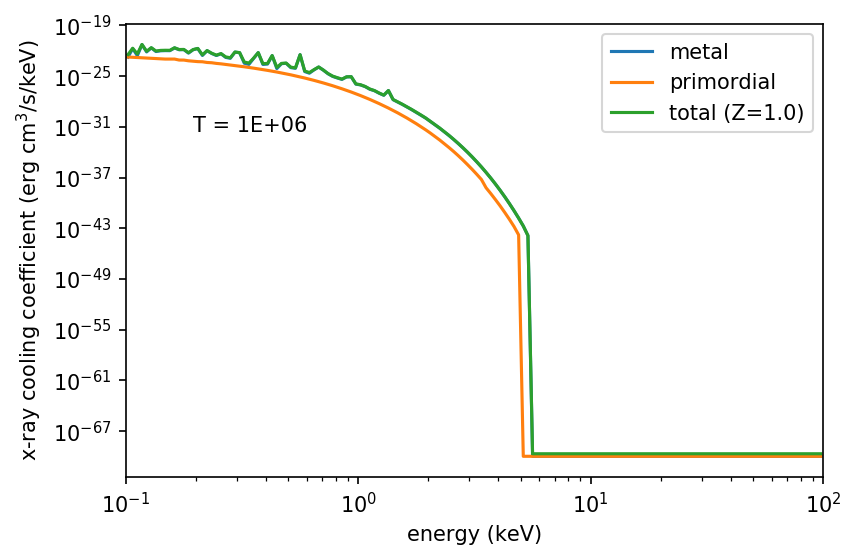

In [8]:
T = 1E6
ind = np.argmin(np.abs(log_T - np.log10(T)))
print(ind)

Z = 1

plt.plot(E_mid, emis_metals[ind,:], label='metal')
plt.plot(E_mid, emis_primordial[ind,:], label='primordial')
plt.plot(E_mid, emis_primordial[ind,:]+Z*emis_metals[ind,:], label='total (Z=%.1f)' % Z)
plt.figtext(0.2, 0.7, 'T = %.0E' % T)
plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlim(0.1, 100)
plt.xlabel('energy (keV)')
plt.ylabel(r'x-ray cooling coefficient (erg cm$^3$/s/keV)')
plt.show()

## Exercise 1b: Plot the spectrum at T = 10^7 K

51


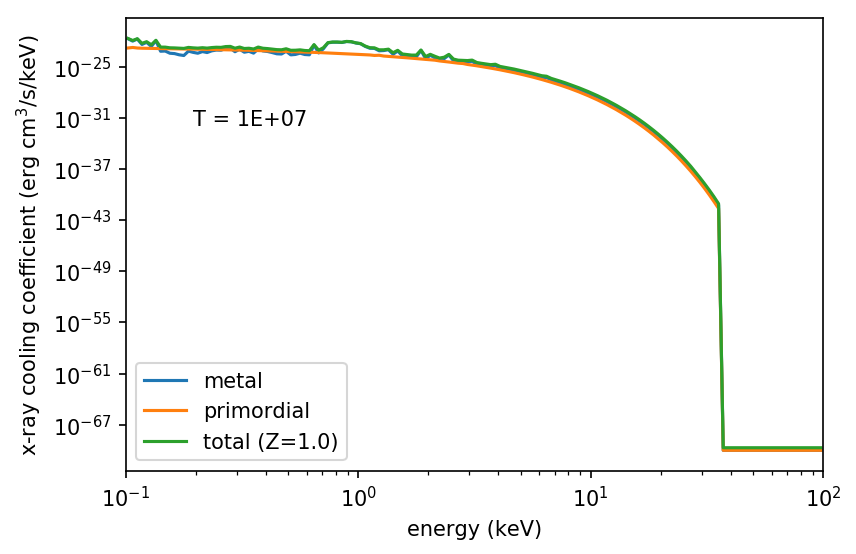

In [9]:
T = 1E7
ind = np.argmin(np.abs(log_T - np.log10(T)))
print(ind)

Z = 1

plt.plot(E_mid, emis_metals[ind,:], label='metal')
plt.plot(E_mid, emis_primordial[ind,:], label='primordial')
plt.plot(E_mid, emis_primordial[ind,:]+Z*emis_metals[ind,:], label='total (Z=%.1f)' % Z)
plt.figtext(0.2, 0.7, 'T = %.0E' % T)
plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlim(0.1, 100)
plt.xlabel('energy (keV)')
plt.ylabel(r'x-ray cooling coefficient (erg cm$^3$/s/keV)')
plt.show()

## Exercise 1c: Plot the spectrum at T = 10^8 K

77


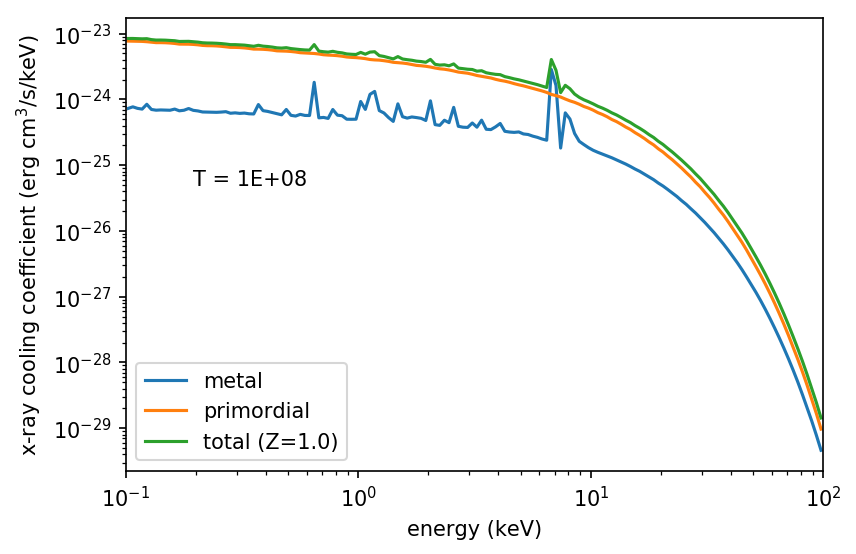

In [10]:
T = 1E8
ind = np.argmin(np.abs(log_T - np.log10(T)))
print(ind)

Z = 1

plt.plot(E_mid, emis_metals[ind,:], label='metal')
plt.plot(E_mid, emis_primordial[ind,:], label='primordial')
plt.plot(E_mid, emis_primordial[ind,:]+Z*emis_metals[ind,:], label='total (Z=%.1f)' % Z)
plt.figtext(0.2, 0.6, 'T = %.0E' % T)
plt.legend()
plt.semilogx()
plt.semilogy()
plt.xlim(0.1, 100)
plt.xlabel('energy (keV)')
plt.ylabel(r'x-ray cooling coefficient (erg cm$^3$/s/keV)')
plt.show()

## Exercise 2a: Plot the cooling function (emissivity as a function of T) in the energy range from 0.1 to 100 keV with metallicity Z=1.

(1e-25, 1e-22)

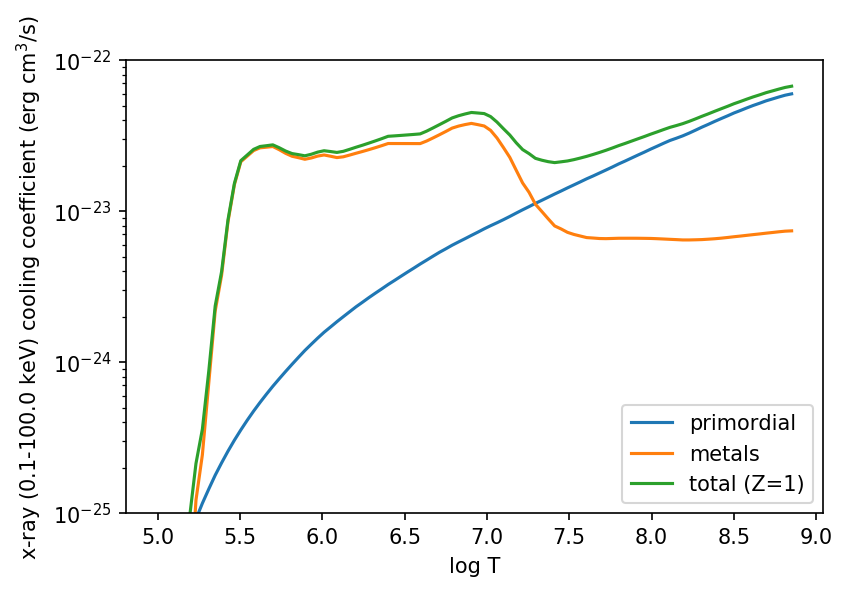

In [11]:
Emax = 100
mask = E[1:] < Emax
plt.plot(log_T, np.sum(emis_primordial[:,mask]*dE[mask], axis=-1), label='primordial')
plt.plot(log_T, np.sum(emis_metals[:,mask]*dE[mask], axis=-1), label='metals')
plt.plot(log_T, np.sum((emis_primordial[:,mask]+emis_metals[:,mask])*dE[mask], axis=-1), label='total (Z=1)')
#plt.plot(log_T, np.sum((emissivity_primordial.value+0.5*emissivity_metals.value)*ebin, axis=-1), label='total (Z=0.5)')
plt.legend()
plt.xlabel('log T')
plt.ylabel(r'x-ray (0.1-%.1f keV) cooling coefficient (erg cm$^3$/s)' % Emax)
plt.semilogy()
plt.ylim(1E-25, 1E-22)

## Exercise 2b: Plot the cooling function in the three energy bands that you chose for the 3-color image

Hint: Use the masks in python to select the energy range
(http://danielandreasen.github.io/:about/2015/01/19/masks-in-python/)